<a href="https://colab.research.google.com/github/AtmakaYanuar/EXPLORATORY-DATA-ANALYSIS/blob/main/2318085.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connect Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.0f}'.format  # tampilkan angka besar normal
sns.set(style='whitegrid')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pembersihan dan Verifikasi Data (Data Cleansing)

In [ ]:
file_path = '/content/drive/MyDrive/Data Mining/Japan_population_data_cleaned.csv'

try:
    df_final = pd.read_csv(file_path)
    print("✅ DATASET POPULASI JEPANG BERHASIL DIMUAT.\n")
    print(f"Jumlah baris data bersih: {len(df_final)}\n")

    # Cek kolom Year & ubah ke integer
    if 'Year' in df_final.columns:
        df_final['Year'] = df_final['Year'].astype(int)

    print("--- Cek Data Bersih (df_final.head()) ---")
    print(df_final.head().to_markdown(index=False))

    print("\n--- Info Kolom ---")
    df_final.info()

except FileNotFoundError:
    print("❌ File tidak ditemukan. Pastikan path sudah benar.")

✅ DATASET POPULASI JEPANG BERHASIL DIMUAT.

Jumlah baris data bersih: 2632

--- Cek Data Bersih (df_final.head()) ---
| prefecture   |   year |   population | capital    | region   |   estimated_area | island   |
|:-------------|-------:|-------------:|:-----------|:---------|-----------------:|:---------|
| aichi-ken    |   1872 |  1.21037e+06 | Nagoya-shi | Chubu    |          5165.12 | Honshu   |
| aichi-ken    |   1873 |  1.21744e+06 | Nagoya-shi | Chubu    |          5165.12 | Honshu   |
| aichi-ken    |   1874 |  1.21752e+06 | Nagoya-shi | Chubu    |          5165.12 | Honshu   |
| aichi-ken    |   1875 |  1.234e+06   | Nagoya-shi | Chubu    |          5165.12 | Honshu   |
| aichi-ken    |   1876 |  1.24471e+06 | Nagoya-shi | Chubu    |          5165.12 | Honshu   |

--- Info Kolom ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 

Pengayaan data

In [ ]:
# Agregasi data untuk pengayaan analisis
df_trend = df_final.groupby('year')['population'].sum().reset_index()
df_pref = df_final.groupby('prefecture')['population'].mean().reset_index()
top10 = df_pref.sort_values('population', ascending=False).head(10)
top_pref = df_pref.sort_values('population', ascending=False).head(3)['prefecture']



Analisis dan Visualisasi Data

In [ ]:
if 'Prefecture' in df_final.columns:
    plt.figure(figsize=(10,6))
    df_pref = df_final.groupby('prefecture')['population'].mean().reset_index()
    sns.barplot(data=df_pref.sort_values('population', ascending=False),
                x='population', y='prefecture', palette='coolwarm')
    plt.title('Rata-rata Populasi per Prefektur di Jepang')
    plt.xlabel('Populasi (Rata-rata)')
    plt.ylabel('Prefektur')
    plt.tight_layout()
    plt.show()

In [ ]:
if 'Prefecture' in df_final.columns:
    plt.figure(figsize=(10,6))
    top10 = df_pref.sort_values('population', ascending=False).head(10)
    sns.barplot(data=top10, x='population', y='prefecture', palette='Reds_r')
    plt.title('Top 10 Prefektur dengan Populasi Tertinggi')
    plt.xlabel('Populasi')
    plt.ylabel('Prefektur')
    plt.tight_layout()
    plt.show()

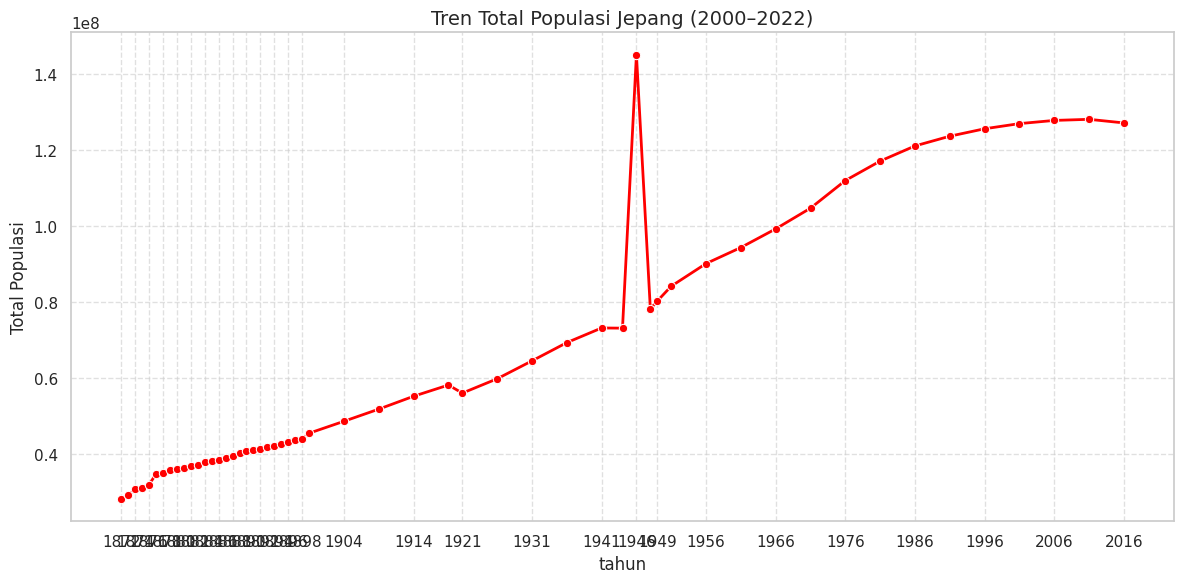

In [ ]:
plt.figure(figsize=(12,6))
df_trend = df_final.groupby('year')['population'].sum().reset_index()
sns.lineplot(data=df_trend, x='year', y='population', marker='o', color='red', linewidth=2)
plt.title('Tren Total Populasi Jepang (2000–2022)', fontsize=14)
plt.xlabel('tahun')
plt.ylabel('Total Populasi')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(df_trend['year'][::2])
plt.tight_layout()
plt.show()

In [ ]:
if 'Prefecture' in df_final.columns:
    top_pref = df_pref.sort_values('Population', ascending=False).head(3)['Prefecture']
    plt.figure(figsize=(12,6))
    for pref in top_pref:
        data_pref = df_final[df_final['Prefecture'] == pref]
        sns.lineplot(data=data_pref, x='Year', y='Population', label=pref, linewidth=2)
    plt.title('Tren Populasi 3 Prefektur Terpadat (2000–2022)')
    plt.xlabel('Tahun')
    plt.ylabel('Populasi')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

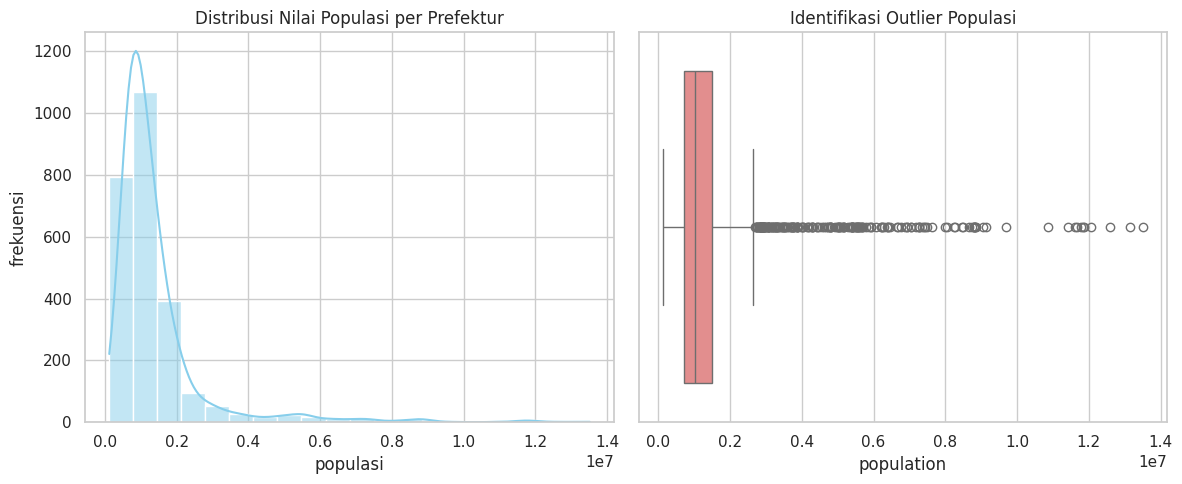

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df_final['population'], kde=True, bins=20, color='skyblue', ax=axes[0])
axes[0].set_title('Distribusi Nilai Populasi per Prefektur')
axes[0].set_xlabel('populasi')
axes[0].set_ylabel('frekuensi')

sns.boxplot(x=df_final['population'], color='lightcoral', ax=axes[1])
axes[1].set_title('Identifikasi Outlier Populasi')

plt.tight_layout()
plt.show()

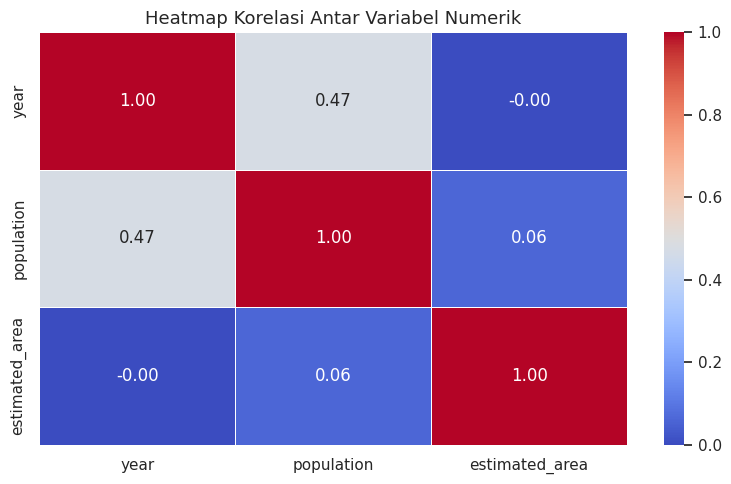

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih hanya kolom numerik
df_corr = df_final.select_dtypes(include=[np.number])

# Cek apakah ada kolom numerik
if df_corr.shape[1] > 1:
    plt.figure(figsize=(8, 5))
    sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Heatmap Korelasi Antar Variabel Numerik', fontsize=13)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Tidak cukup kolom numerik untuk membuat heatmap.")
